In [9]:
import pandas as pd

ds1_cnfs = pd.read_csv(f"cnfs/ds1.csv", index_col="instance")
ds2_cnfs = pd.read_csv(f"cnfs/ds2.csv", index_col="instance")
ds_stat = pd.read_csv("results/ds_random_cnfs.csv", index_col=["dataset", "instance", "model", "method"])

means = ds_stat.groupby(["dataset", "model", "method", "n"]).apply(lambda group: group.mean())
mins = ds_stat.groupby(["dataset", "model", "method", "n"]).apply(lambda group: group.min())
maxs = ds_stat.groupby(["dataset", "model", "method", "n"]).apply(lambda group: group.max())

ds_cnfs_name = "ds2"
ds_cnfs = { "ds1": ds1_cnfs, "ds2": ds2_cnfs }[ds_cnfs_name]

In [10]:
import matplotlib.pyplot as plt 
import matplotlib 
plt.rcParams.update({ 
    "text.usetex": True, 
    "font.family": "serif", 
    "font.size": 12,
    "figure.figsize": (5, 5) 
})

def plot_settings():
    plt.legend(loc="lower center", bbox_to_anchor=(0.5,1), ncol=2, shadow=False, framealpha=0, edgecolor="1")
    plt.grid(True)
    plt.tight_layout()

use_pgf = False 
if use_pgf: matplotlib.use("pgf")
else: matplotlib.use("module://matplotlib_inline.backend_inline")

def plot(ds_cnfs_name, means, maxs, mins, model, method, label, fmt="x--", with_error=False, parsing=False):
    instances = means.loc[(ds_cnfs_name, model, method), "n"]
    # instances = list(map(int, instances))
    # plt.xticks(instances)
    instances = list(map(lambda it: f"${int(it)}$", instances.index))
    times_mean = means.loc[(ds_cnfs_name, model, method), "ot"]
    times_mins = mins.loc[(ds_cnfs_name, model, method), "ot"]
    times_maxs = maxs.loc[(ds_cnfs_name, model, method), "ot"]
    if parsing:
        times_mean -= means.loc[(ds_cnfs_name, model, method), "mt"]
        times_mins -= mins.loc[(ds_cnfs_name, model, method), "mt"]
        times_maxs -= maxs.loc[(ds_cnfs_name, model, method), "mt"]

    if with_error:
        plt.errorbar(
            instances,
            times_mean, 
            yerr=[times_mean-times_mins, times_maxs-times_mean], 
            fmt=fmt, label=label, barsabove=True)
    else:
        plt.errorbar(
            instances, 
            times_mean, 
            fmt=fmt, label=label)
    plot_settings()
    plt.xlabel("Number of variables")
    plt.ylabel("Time [ms]")
    # if ds_cnfs_name == "ds1": plt.title("Random $(n, 3n, 7)$-CNF instances")
    # elif ds_cnfs_name == "ds2": plt.title("Random $(n, 7n, 4)$-CNF instances")
    plt.yscale("log")

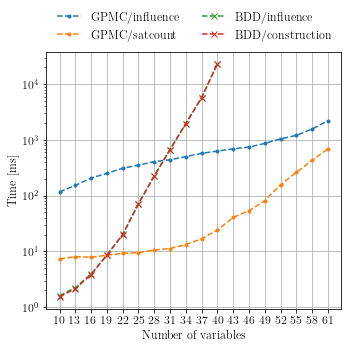

In [11]:
plot(ds_cnfs_name, means, maxs, mins, "GPMC", "influence", fmt=".--", label="GPMC/influence")
plot(ds_cnfs_name, means, maxs, mins, "GPMC", "raw_satcount", fmt=".--", label="GPMC/satcount")
# plot(ds_cnfs_name, means, maxs, mins, "GPMC", "tseitin", fmt=".--", label="GPMC/tseitin")
# plot(ds_cnfs_name, means, maxs, mins, "GPMC", "blame", fmt=".--", label="GPMC: Blame")
# plot(ds_cnfs_name, means, maxs, mins, "GPMC", "mblame", fmt=".--", label="GPMC: Modified Blame")
plot(ds_cnfs_name, means, maxs, mins, "BDD", "influence", fmt="x--", label="BDD/influence")
# plot(ds_cnfs_name, means, maxs, mins, "BDD", "satcount", fmt="x--", label="BuDDy: Satcount")
plot(ds_cnfs_name, means, maxs, mins, "BDD", "influence", fmt="x--", label="BDD/construction", parsing=True)
# plot(ds_cnfs_name, means, maxs, mins, "BDD", "satcount", fmt="x--", label="BuDDy: Satcount")
# plot(ds_cnfs_name, means, maxs, mins, "BDD", "blame", fmt="x--", label="BuDDy: Blame")
# plot(ds_cnfs_name, means, maxs, mins, "BDD", "mblame", fmt="x--", label="BuDDy: Modified Blame")
# plot(ds_cnfs_name, means, maxs, mins, "BDD", "dominating_cgm", fmt="x--", label="BuDDy: Dominating CGM")
if use_pgf: plt.savefig(f"pics/influence_ot_{ds_cnfs_name}.pgf")
else: plt.show()

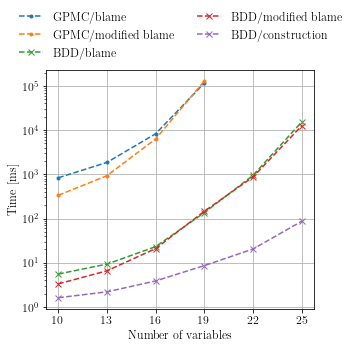

In [12]:
plot(ds_cnfs_name, means, maxs, mins, "GPMC", "blame", fmt=".--", label="GPMC/blame")
plot(ds_cnfs_name, means, maxs, mins, "GPMC", "mblame", fmt=".--", label="GPMC/modified blame")
# plot(ds_cnfs_name, means, maxs, mins, "GPMC", "satcount", fmt=".--", label="GPMC: Satcount")
plot(ds_cnfs_name, means, maxs, mins, "BDD", "blame", fmt="x--", label="BDD/blame")
plot(ds_cnfs_name, means, maxs, mins, "BDD", "mblame", fmt="x--", label="BDD/modified blame")
plot(ds_cnfs_name, means, maxs, mins, "BDD", "blame", fmt="x--", label="BDD/construction", parsing=True)
# plot(ds_cnfs_name, means, maxs, mins, "BDD", "satcount", fmt=".--", label="BDD: Satcount")
if use_pgf: plt.savefig(f"pics/blame_ot_{ds_cnfs_name}.pgf")
else: plt.show()

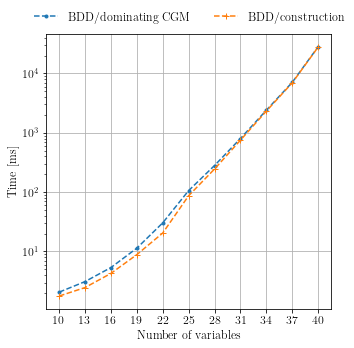

In [13]:
plot(ds_cnfs_name, means, maxs, mins, "BDD", "dominating_cgm", fmt=".--", label="BDD/dominating CGM")
plot(ds_cnfs_name, means, maxs, mins, "BDD", "dominating_cgm", fmt="+--", label="BDD/construction", parsing=True)
if use_pgf: plt.savefig(f"pics/dominating_cgm_ot_{ds_cnfs_name}.pgf")
else: plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


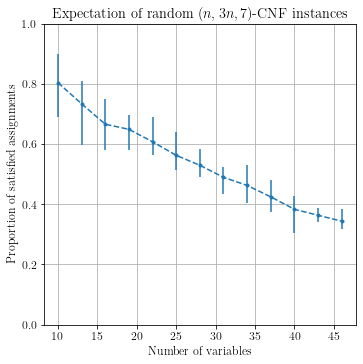

In [14]:
# Expected values
ds = ds1_cnfs # ds2 too low expectations

means = ds[["n","expectation"]].groupby("n").apply(lambda group: group.mean())
mins = ds[["n","expectation"]].groupby("n").apply(lambda group: group.min())
maxs = ds[["n","expectation"]].groupby("n").apply(lambda group: group.max())
ys, yslow, yshigh = means["expectation"], mins["expectation"], maxs["expectation"]
plt.errorbar(
    means["n"], 
    ys, yerr=[ ys - yslow, yshigh - ys ], 
    fmt=".--")

plot_settings()
plt.ylim((0,1))
plt.xlabel("Number of variables")
plt.ylabel("Proportion of satisfied assignments")
plt.title("Expectation of random $(n, 3n, 7)$-CNF instances")
plt.yscale("linear")

if use_pgf: plt.savefig("pics/expected_value_ot_ds1.pgf")
else: plt.show()

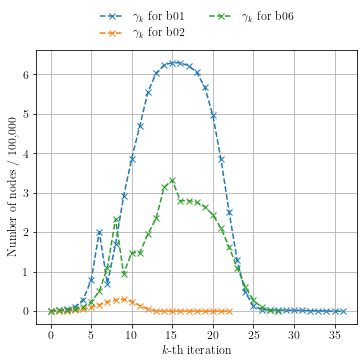

In [15]:
# BDD sizes
df_sizes = pd.read_csv("results/blame_bdd_sizes.csv", index_col=["instance", "k"])
for b in ["b01", "b02", "b06"]:
    # index = [f"${int(idx)}$" for idx in df_sizes.loc[b].index]
    index = df_sizes.loc[b].index 
    plt.plot(index, df_sizes.loc[b]["BDD_size"] / 100000, "x--", label=f"$\gamma_k$ for {b}")
plot_settings()
plt.xlabel("$k$-th iteration")
plt.ylabel("Number of nodes / 100,000")
plt.yscale("linear")
# plt.title("BDD nodes vs. progress of blame computation")
if use_pgf: plt.savefig("pics/bdd_nodes_blame.pgf")
else: plt.show()